<a href="https://colab.research.google.com/github/peppishroom/ufo-sightings/blob/main/UFO_sighting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-358ea4b65e01>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo_sighting.csv', usecols=['latitude', 'longitude '])


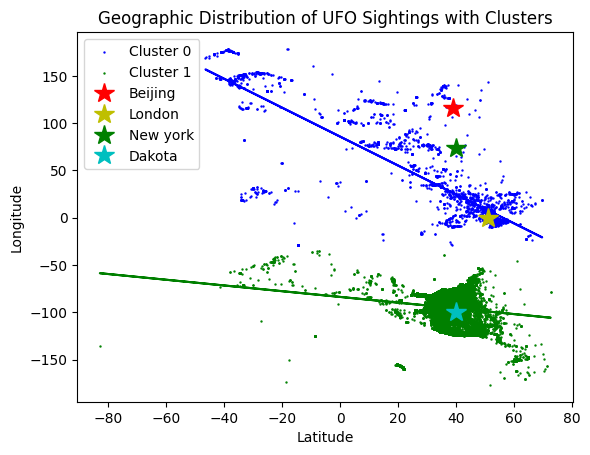

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# read and clean data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo_sighting.csv', usecols=['latitude', 'longitude '])

# convert to numeric
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude '] = pd.to_numeric(data['longitude '], errors='coerce')

# remove NaN values
data = data.dropna(subset=['latitude', 'longitude '])

# prepare data for clustering
X = np.column_stack((data['latitude'], data['longitude ']))

# create and fit k-means
kmeans = KMeans(n_clusters=2, random_state=100)
data['cluster'] = kmeans.fit_predict(X)

# get centers
centers = kmeans.cluster_centers_

# separate data by cluster
cluster0 = data[data['cluster'] == 0]
cluster1 = data[data['cluster'] == 1]

# create separate linear regressions for each cluster
model0 = LinearRegression()
model1 = LinearRegression()

# fit models
model0.fit(cluster0['latitude'].values.reshape(-1, 1), cluster0['longitude '].values)
model1.fit(cluster1['latitude'].values.reshape(-1, 1), cluster1['longitude '].values)

# Get coefficients
m0 = model0.coef_[0]
b0 = model0.intercept_
m1 = model1.coef_[0]
b1 = model1.intercept_

# plot points by cluster
plt.scatter(cluster0['latitude'], cluster0['longitude '], c='blue', s=0.5, label='Cluster 0')
plt.scatter(cluster1['latitude'], cluster1['longitude '], c='green', s=0.5, label='Cluster 1')

# plot regression lines using mx + b format
x0 = cluster0['latitude'].values
x1 = cluster1['latitude'].values
plt.plot(x0, x0*m0 + b0, 'b')
plt.plot(x1, x1*m1 + b1, 'g')

# add cities, legend, and pretty stuff :)
plt.plot(39, 116, 'r*', markersize=15, label='Beijing')
plt.plot(51, 0.1, 'y*', markersize=15, label='London')
plt.plot(40, 74, 'g*', markersize=15, label='New york')
plt.plot(40, -100, 'c*', markersize=15, label='Dakota')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution of UFO Sightings with Clusters')
plt.legend()

plt.savefig("clustered_regression.png")
plt.show()